In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras import Sequential
from keras import layers
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import adam_v2
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
import random as rd
import collections as clt

In [2]:
import module

In [3]:
import importlib
importlib.reload(module)

<module 'module' from 'C:\\Users\\Admin\\Documents\\Anaconda\\Project4-EdgeEval\\module.py'>

In [4]:
browser = 'firefox'

In [5]:
train_data, train_index, test_data, test_index = module.load_data('F:/data_' + browser + '/3_data/data.csv')
test_data_ow = module.load_data_ow('F:/data_' + browser + '/3_data/data_ow.csv')
model = load_model('F:/data_' + browser + '/4_result/model_cnn.h5')

data shape: (10000, 1002)
train data shape: (8000, 500)
test data shape: (2000, 500)
test data ow shape: (1000, 500)


In [6]:
WF_TPR, WF_FPR = module.ow_evaluate(model, test_data, test_data_ow)

In [7]:
random_data = module.random_defense(test_data, 20, 1514)
random_data_ow = module.random_defense(test_data_ow, 20, 1514)

In [8]:
random_TPR, random_FPR = module.ow_evaluate(model, random_data, random_data_ow)

In [9]:
filter_data = module.filter_attack(random_data, train_data)
filter_data_ow = module.filter_attack(random_data_ow, train_data)

In [10]:
filter_TPR, filter_FPR = module.ow_evaluate(model, filter_data, filter_data_ow)

In [11]:
# plt.figure(figsize=(6,5))
# plt.plot(WF_FPR, WF_TPR, 'r^--')
# plt.plot(random_FPR, random_TPR, 'go-')
# plt.plot(filter_FPR, filter_TPR, 'b^--')
# plt.legend(['WF Attack', 'RPD Large', 'FAA Large'], fontsize=14)
# plt.xlim((0,1))
# plt.ylim((0,1))
# plt.xlabel('FPR', fontsize=18)
# plt.ylabel('TPR', fontsize=18)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.grid()
# plt.savefig('C:/Users/Admin/Desktop/roc_random_' + browser + '.pdf', bbox_inches = 'tight')

In [12]:
list_data_insert = module.list_defense_insert(test_data, 20, train_data)
list_data_insert_ow = module.list_defense_insert(test_data_ow, 20, train_data)
list_data_divide, p_real = module.list_defense_divide(test_data, 35, train_data)
print(p_real)
list_data_divide_ow, p_real = module.list_defense_divide(test_data_ow, 35, train_data)
print(p_real)

17.7952966674294
20.820690223210608


In [13]:
list_TPR_insert, list_FPR_insert = module.ow_evaluate(model, list_data_insert, list_data_insert_ow)
list_TPR_divide, list_FPR_divide = module.ow_evaluate(model, list_data_divide, list_data_divide_ow)

In [14]:
filter_data_insert = module.filter_attack(list_data_insert, train_data)
filter_data_ow_insert = module.filter_attack(list_data_insert_ow, train_data)
filter_data_divide = module.filter_attack(list_data_divide, train_data)
filter_data_ow_divide = module.filter_attack(list_data_divide_ow, train_data)

In [15]:
filter_TPR_insert, filter_FPR_insert = module.ow_evaluate(model, filter_data_insert, filter_data_ow_insert)
filter_TPR_divide, filter_FPR_divide = module.ow_evaluate(model, filter_data_divide, filter_data_ow_divide)

In [16]:
# plt.figure(figsize=(6,5))
# plt.plot(WF_FPR, WF_TPR, 'r^--')
# plt.plot(list_TPR_insert, list_FPR_insert, 'go-')
# plt.plot(list_TPR_divide, list_FPR_divide, 'bo-')
# plt.plot(filter_FPR_insert, filter_TPR_insert, 'g^--')
# plt.plot(filter_FPR_divide, filter_TPR_divide, 'b^--')
# plt.legend(['WF Attack', 'LAD Insert', 'LAD Split', 'FAA Insert', 'FAA Split'], fontsize=14)
# plt.xlim((0,1))
# plt.ylim((0,1))
# plt.xlabel('FPR', fontsize=18)
# plt.ylabel('TPR', fontsize=18)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.grid()
# plt.savefig('C:/Users/Admin/Desktop/roc_list_' + browser + '.pdf', bbox_inches = 'tight')

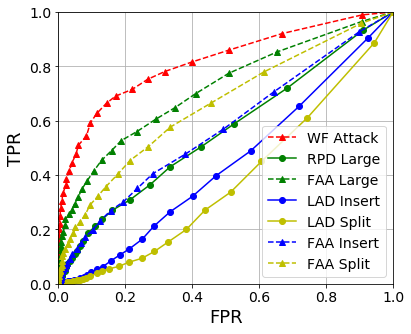

In [17]:
plt.figure(figsize=(6,5))

plt.plot(WF_FPR, WF_TPR, 'r^--')

plt.plot(random_FPR, random_TPR, 'go-')
plt.plot(filter_FPR, filter_TPR, 'g^--')

plt.plot(list_TPR_insert, list_FPR_insert, 'bo-')
plt.plot(list_TPR_divide, list_FPR_divide, 'yo-')
plt.plot(filter_FPR_insert, filter_TPR_insert, 'b^--')
plt.plot(filter_FPR_divide, filter_TPR_divide, 'y^--')

plt.legend(['WF Attack', 'RPD Large', 'FAA Large', 'LAD Insert', 'LAD Split', 'FAA Insert', 'FAA Split'], fontsize=14)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('FPR', fontsize=18)
plt.ylabel('TPR', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('C:/Users/Admin/Desktop/roc_' + browser + '.pdf', bbox_inches = 'tight')